<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

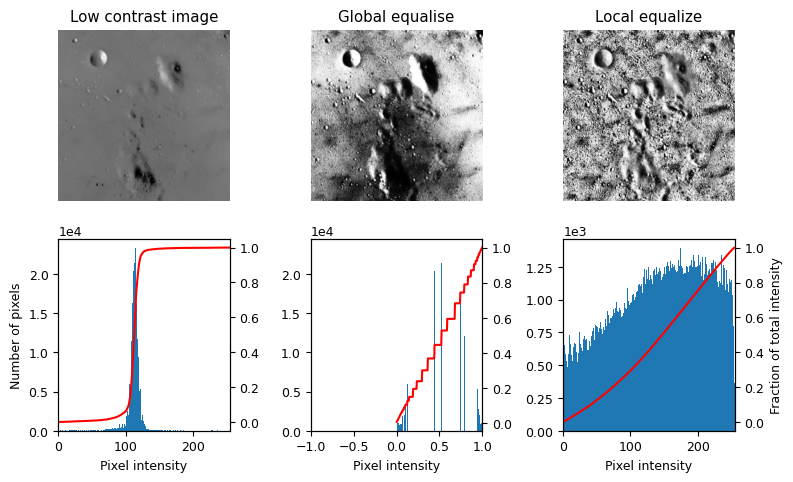

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank
matplotlib.rcParams['font.size'] = 9
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)
    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    return ax_img, ax_hist, ax_cdf
# Load an example image
img = img_as_ubyte(data.moon())
# Global equalize
img_rescale = exposure.equalize_hist(img)
# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')
# prevent overlap of y-axis labels
fig.tight_layout()

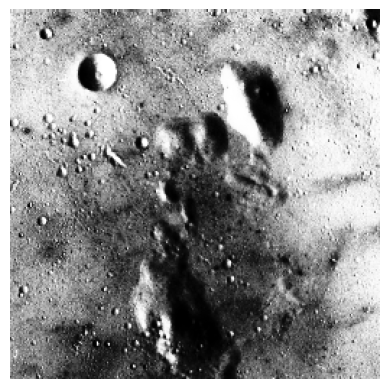

In [ ]:
# @title Use scikit-image to complete global histogram equalization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
matplotlib.rcParams["font.size"] = 11
img = img_as_ubyte(data.moon())
img_rescale = exposure.equalize_hist(img)
plt.imshow(img_rescale, cmap="gray")
plt.axis("off")
plt.show()

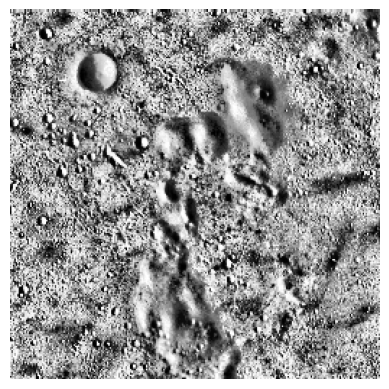

In [ ]:
# @title Local histogram equalization using scikit-image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
img = img_as_ubyte(data.moon())
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)
plt.imshow(img_eq, cmap= "gray")
plt.axis("off")
plt.show()

i found that selem can't be outputtted beacuse in this google colab "selem" is outdated. so i will use footprint instead.



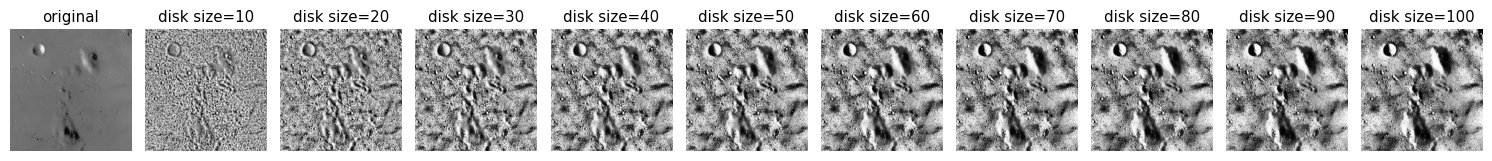

In [ ]:
# @title Modify the parameters of the local histogram equalization to find the best result
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
img = img_as_ubyte(data.moon())
disksize = list(range(10, 101, 10))
images_eq = []
for size in disksize:
    footprint = disk(size)
    img_eq = rank.equalize(img, footprint=footprint)
    images_eq.append(img_eq)
fig, axes = plt.subplots(1, len(disksize) + 1, figsize=(15, 5))
axes[0].set_title("original")
axes[0].imshow(img, cmap="gray")
axes[0].axis("off")
for i, size in enumerate(disksize):
    axes[i + 1].imshow(images_eq[i], cmap="gray")
    axes[i + 1].set_title(f"disk size={size}")
    axes[i + 1].axis("off")
plt.tight_layout()
plt.show()

i made a comparison using for loops to show the limit of the disk size that can equalized , and bases in the the output we can see that the image maxed on the size fo 50.

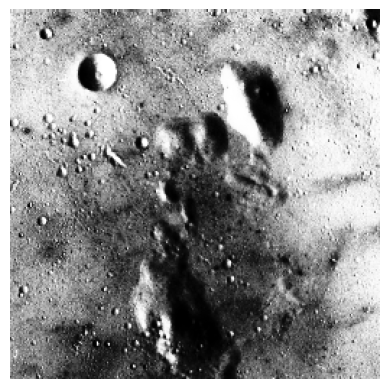

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
img = img_as_ubyte(data.moon())# load the image
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])# flatten the image and compute the histogram
cdf = hist.cumsum()# compute the cumulative distribution function (CDF)
cdf = cdf * hist.max() / cdf.max()# normalize the CDF
imgeq = np.interp(img.flatten(), bins[:-1], cdf)# use the normalized CDF to map the original pixel values to equalized values
imgeq = imgeq.reshape(img.shape)
plt.imshow(imgeq, cmap="gray")# display the equalized image
plt.axis("off")
plt.show()

i did teh global equalizer without using the tools of skimage , and found teh methods of cdf equalizing which are teh fundamentals of global equalizing or maybe the alternative. i found a primitive method of the cdf equalizing but i chose the easier and maybe more optimized by using some tools fucntion